PIPELINE FOR CONSTRAINING N AND r

In [4]:
using Newtrinos
using CairoMakie
using JLD2

In [17]:
# load the scan
JLD2.@load "scan_dayabay_Nr_70_NNM_m0=0.1.jld2" result

1-element Vector{Symbol}:
 :result

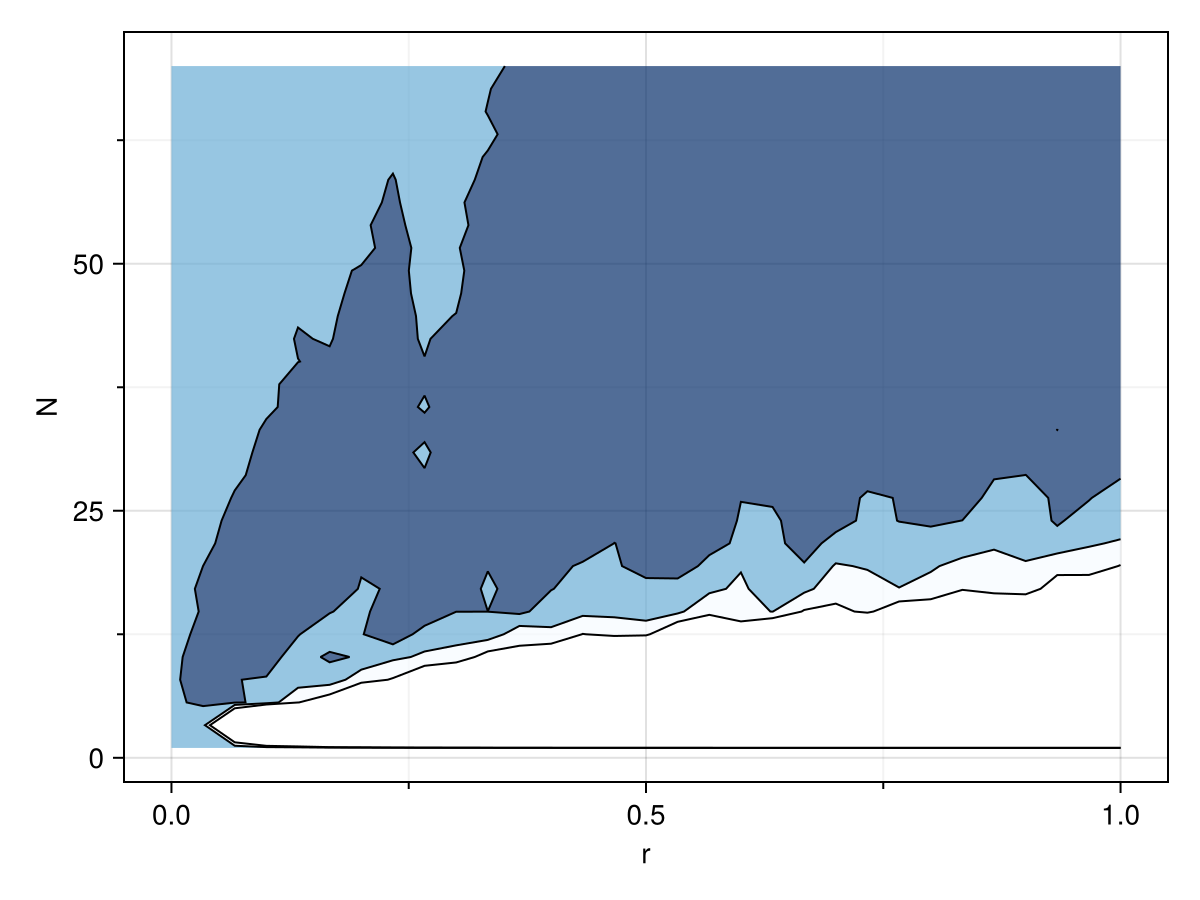

In [18]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/minos/minos_rN_m0=0.1_NNM.png", img)


Nindex: 10


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


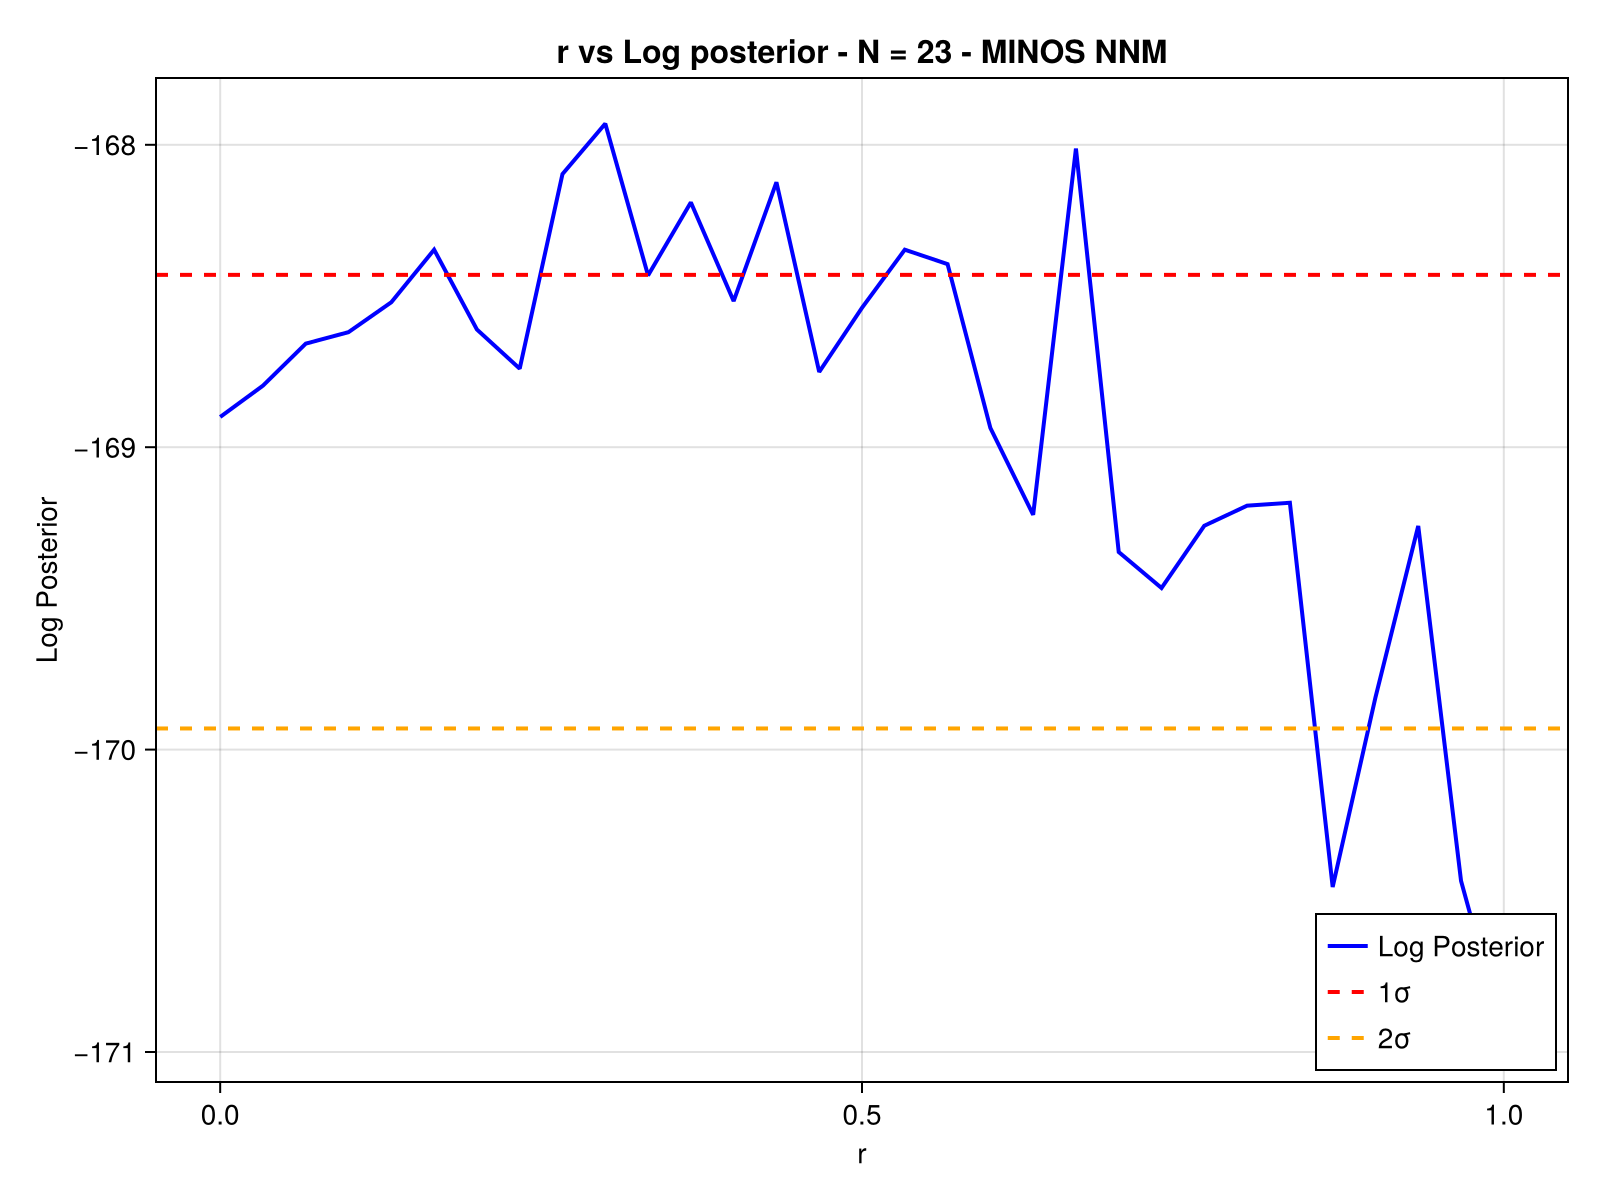

In [37]:
#plot the logposterior value vs r

#value of N fixed
Nfixed = 23
Nmax=70
Nindex = round(Int, 31/Nmax* Nfixed)
println("Nindex: ", Nindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, Nindex ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, Nindex ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior - N = $Nfixed - MINOS NNM",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, Nindex],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
#save("/home/sofialon/Newtrinos.jl/profiled plot/minos/minos_rLogpost_m0=0.1_NNM_N=$Nfixed.png", fig)


In [31]:
# find the N at which the log posterior reach the 2-sigma treshold


N_values= result.axes.N
log_post_values = result.values.log_posterior[31, :]

# Find the N at which the log posterior reaches the 2-sigma threshold
N_2sigma = N_values[log_post_values .< sigma_2_threshold]

9-element Vector{Float64}:
  3.3
  5.6
  7.9
 10.2
 12.5
 14.8
 17.1
 19.4
 21.7